# Single Cosmic Watch Data Analysis
Data from a single cosmic watch was collected for 1 hour in a light tight box and then 1 hour out of the light tight box. A control watch was set up outside the box and data collected for both hours.

In [2]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


dataDark = pd.read_csv('CW_Dark_2023_Jul_24.csv')
dataLight = pd.read_csv('CW_Light_2023_Jul_24.csv')


,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,381,389,81.58,726,26.81
1,2,502,238,40.82,730,26.59
2,3,643,482,129.60,734,27.13
3,4,1508,287,50.23,923,26.48
4,5,1563,338,62.67,927,26.81
...,...,...,...,...,...,...
145802,145803,84678901,335,61.77,16485780,27.02
145803,145804,84679952,402,87.25,16485971,27.34
145804,145805,84680319,441,109.77,16486163,26.70
145805,145806,84681222,415,95.00,16486355,26.70


In [3]:
dataDark.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Event,145807.0,7.290400e+04,4.209100e+04,1.00,36452.50,72904.00,109355.50,145807.00
RunTime,145807.0,4.259338e+07,2.433375e+07,381.00,21688120.50,42663636.00,63595407.50,84681280.00
ADC,145807.0,2.931171e+02,1.924759e+02,9.00,113.00,262.00,462.00,1023.00
SiPM,145807.0,8.273185e+01,1.080081e+02,10.29,23.02,45.24,119.23,2926.95
DownTime,145807.0,8.275705e+06,4.738706e+06,726.00,4202089.00,8280828.00,12364984.50,16486360.00
Temp,145807.0,2.721903e+01,2.687083e-01,26.05,27.13,27.34,27.34,27.88


In [ ]:
dataLight.describe().transpose()

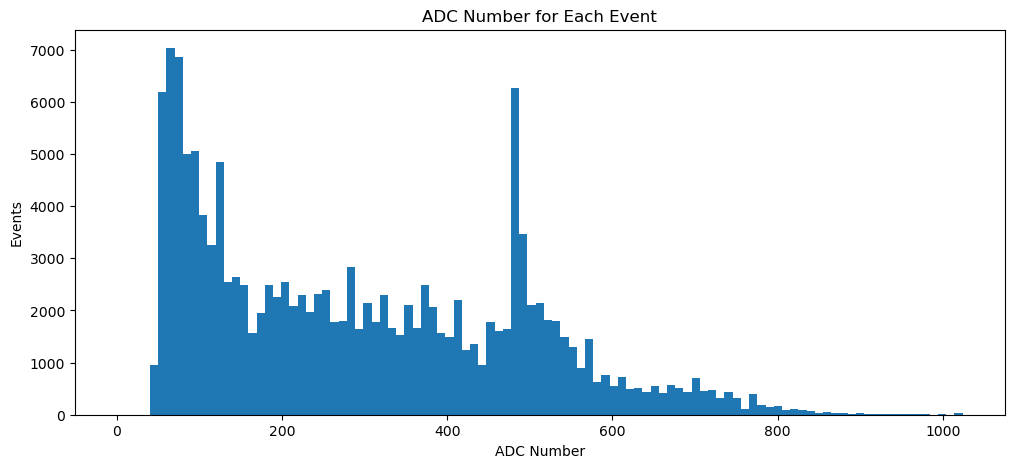

In [15]:
# This makes a histogram of that totally useless calculation above
plt.figure(figsize=(12,5))
plt.hist(dataDark.ADC, bins=103, range=[0,1024], log=False)
plt.hist(dataLight.ADC, bins=103, range=[0,1024], log=False)
plt.title("ADC Number for Each Event")
plt.xlabel("ADC Number")
plt.ylabel("Events");

In [5]:
# Dark CosmicWatch
dataDark['UpTime'] = (data.RunTime - data.DownTime)
dataDark['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
dataDark['Minute']= (data.UpTime/(60000))
dataDark.Minute = (data.Minute).astype(int)
dataDark['avgRate'] = data.Event/(data.UpTime/1000)

Data1MinDark = dataDark.drop_duplicates(subset=['Minute'], keep='first')
Data1MinDark = Data1MinDark.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data1MinDark['DeltaCount'] = Data1MinDark.Event - Data1MinDark.Event.shift(1)
Data1MinDark['DeltaUpTime'] = Data1MinDark.UpTime - Data1MinDark.UpTime.shift(1)
Data1MinDark['Rate'] = Data1MinDark.DeltaCount / (Data1MinDark.DeltaUpTime /1000)

# Light CosmicWatch
dataLight['UpTime'] = (data.RunTime - data.DownTime)
dataLight['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
dataLight['Minute']= (data.UpTime/(60000))
dataLight.Minute = (data.Minute).astype(int)
dataLight['avgRate'] = data.Event/(data.UpTime/1000)

Data1MinLight = dataLight.drop_duplicates(subset=['Minute'], keep='first')
Data1MinLight = Data1MinLight.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data1MinLight['DeltaCount'] = Data1MinLight.Event - Data1MinLight.Event.shift(1)
Data1MinLight['DeltaUpTime'] = Data1MinLight.UpTime - Data1MinLight.UpTime.shift(1)
Data1MinLight['Rate'] = Data1MinLight.DeltaCount / (Data1MinLight.DeltaUpTime /1000)

# Plot
plt.figure(figsize=(12,5))
plt.plot(Data1MinDark.Minute,Data1MinDark.Rate)
plt.plot(Data1MinLight.Minute,Data1MinLight.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,381,389,81.58,726,26.81,-345,-1 days +23:59:59.655000,0,-2.898551
1,2,502,238,40.82,730,26.59,-228,-1 days +23:59:59.772000,0,-8.771930
2,3,643,482,129.60,734,27.13,-91,-1 days +23:59:59.909000,0,-32.967033
3,4,1508,287,50.23,923,26.48,585,0 days 00:00:00.585000,0,6.837607
4,5,1563,338,62.67,927,26.81,636,0 days 00:00:00.636000,0,7.861635
...,...,...,...,...,...,...,...,...,...,...
145802,145803,84678901,335,61.77,16485780,27.02,68193121,0 days 18:56:33.121000,1136,2.138090
145803,145804,84679952,402,87.25,16485971,27.34,68193981,0 days 18:56:33.981000,1136,2.138077
145804,145805,84680319,441,109.77,16486163,26.70,68194156,0 days 18:56:34.156000,1136,2.138086
145805,145806,84681222,415,95.00,16486355,26.70,68194867,0 days 18:56:34.867000,1136,2.138079


In [6]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551
129,130,75983,15127,60856,0 days 00:01:00.856000,1,2.136190
242,243,149476,29342,120134,0 days 00:02:00.134000,2,2.022741
381,382,224983,43836,181147,0 days 00:03:01.147000,3,2.108785
504,505,297922,57893,240029,0 days 00:04:00.029000,4,2.103912
...,...,...,...,...,...,...,...
145202,145203,84341330,16419695,67921635,0 days 18:52:01.635000,1132,2.137802
145343,145344,84413943,16433886,67980057,0 days 18:53:00.057000,1133,2.138039
145493,145494,84488964,16448700,68040264,0 days 18:54:00.264000,1134,2.138351
145626,145627,84563627,16463387,68100240,0 days 18:55:00.240000,1135,2.138421


In [8]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551,NaN,NaN,NaN
129,130,75983,15127,60856,0 days 00:01:00.856000,1,2.136190,129.0,61201.0,2.107809
242,243,149476,29342,120134,0 days 00:02:00.134000,2,2.022741,113.0,59278.0,1.906272
381,382,224983,43836,181147,0 days 00:03:01.147000,3,2.108785,139.0,61013.0,2.278203
504,505,297922,57893,240029,0 days 00:04:00.029000,4,2.103912,123.0,58882.0,2.088924
...,...,...,...,...,...,...,...,...,...,...
145202,145203,84341330,16419695,67921635,0 days 18:52:01.635000,1132,2.137802,125.0,61395.0,2.035996
145343,145344,84413943,16433886,67980057,0 days 18:53:00.057000,1133,2.138039,141.0,58422.0,2.413474
145493,145494,84488964,16448700,68040264,0 days 18:54:00.264000,1134,2.138351,150.0,60207.0,2.491405
145626,145627,84563627,16463387,68100240,0 days 18:55:00.240000,1135,2.138421,133.0,59976.0,2.217554


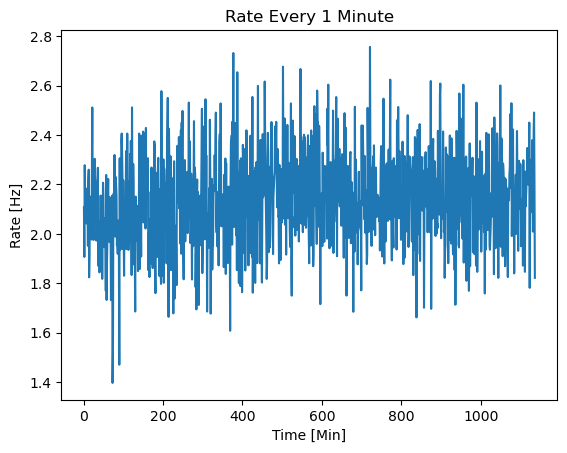

In [9]:
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [10]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551
628,629,372766,72351,300415,0 days 00:05:00.415000,5,2.093770
1257,1258,744477,144101,600376,0 days 00:10:00.376000,10,2.095354
1866,1867,1115884,215688,900196,0 days 00:15:00.196000,15,2.073993
2486,2487,1487780,287558,1200222,0 days 00:20:00.222000,20,2.072117
...,...,...,...,...,...,...,...
142948,142949,83071470,16171305,66900165,0 days 18:35:00.165000,1115,2.136751
143629,143630,83445346,16244660,67200686,0 days 18:40:00.686000,1120,2.137329
144278,144279,83817748,16317285,67500463,0 days 18:45:00.463000,1125,2.137452
144957,144958,84190789,16390282,67800507,0 days 18:50:00.507000,1130,2.138008


In [11]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551,NaN,NaN,NaN
628,629,372766,72351,300415,0 days 00:05:00.415000,5,2.093770,628.0,300760.0,2.088044
1257,1258,744477,144101,600376,0 days 00:10:00.376000,10,2.095354,629.0,299961.0,2.096939
1866,1867,1115884,215688,900196,0 days 00:15:00.196000,15,2.073993,609.0,299820.0,2.031219
2486,2487,1487780,287558,1200222,0 days 00:20:00.222000,20,2.072117,620.0,300026.0,2.066488
...,...,...,...,...,...,...,...,...,...,...
142948,142949,83071470,16171305,66900165,0 days 18:35:00.165000,1115,2.136751,633.0,299369.0,2.114447
143629,143630,83445346,16244660,67200686,0 days 18:40:00.686000,1120,2.137329,681.0,300521.0,2.266065
144278,144279,83817748,16317285,67500463,0 days 18:45:00.463000,1125,2.137452,649.0,299777.0,2.164943
144957,144958,84190789,16390282,67800507,0 days 18:50:00.507000,1130,2.138008,679.0,300044.0,2.263001


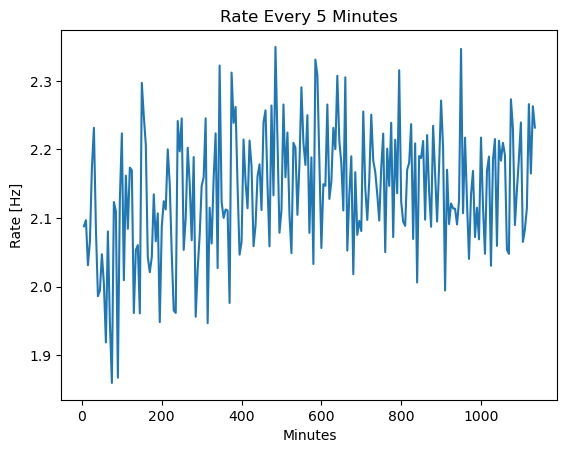

In [12]:
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

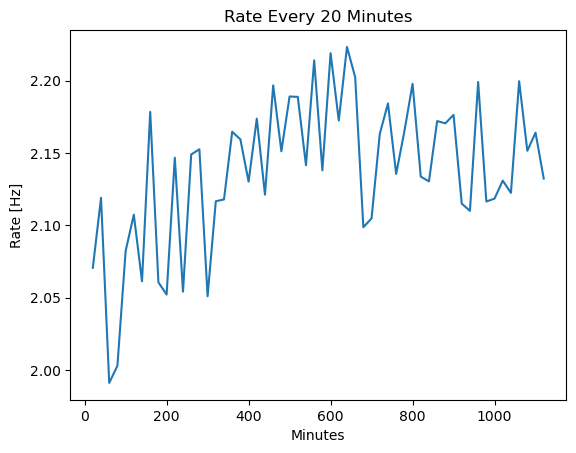

In [13]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

In [14]:
high = data.query('SiPM > 1000')

high

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
304,305,187432,992,2321.66,36652,26.81,150780,0 days 00:02:30.780000,2,2.022815
338,339,200593,953,1435.15,39215,26.81,161378,0 days 00:02:41.378000,2,2.100658
808,809,483844,920,1325.16,93705,26.91,390139,0 days 00:06:30.139000,6,2.073620
2878,2879,1696522,1023,2152.99,328189,26.27,1368333,0 days 00:22:48.333000,22,2.104020
2984,2985,1768235,899,1139.40,342060,26.59,1426175,0 days 00:23:46.175000,23,2.093011
...,...,...,...,...,...,...,...,...,...,...
142102,142103,82576239,940,1137.98,16074395,26.27,66501844,0 days 18:28:21.844000,1108,2.136828
142233,142234,82658325,952,1801.44,16090338,26.38,66567987,0 days 18:29:27.987000,1109,2.136673
142883,142884,83032386,902,1072.36,16163521,26.81,66868865,0 days 18:34:28.865000,1114,2.136779
144681,144682,84038935,877,1029.74,16360551,26.38,67678384,0 days 18:47:58.384000,1127,2.137787
